What will I do with my data:

Basic Data cleaning: To esnure I have the right data quality I will need to perform data cleaning and explore my data 
Exploratory data analysis: using visualsations to summarise statisxs which will help me uncover insights, relationships and anomalies. 
Basic Data Engineering: Creating a pipeline for tain and test sets
Model Experimentation and parameter tuning: Linear Regression (XGBoost libary)
Feature Engineering
Ensembling
Using Documentation and Model tools to make this task easier such as StackOverflow & ChatGPT

Importing Libaries

In [1]:
import numpy as np #For numpy arrays
import pandas as pd # Creating and maniuplating data frames
import matplotlib.pyplot as plt # Visuals 
import seaborn as sns # Visuals 
import sklearn.datasets # ML Algos
from sklearn.model_selection import train_test_split #Training model + splitting the test and train data
from sklearn import metrics # accuracy scores
from IPython.display import display
from IPython.display import HTML
from xgboost import XGBRegressor #supervised regression task

Data Exploration

import data
look at summary statsitcs 
evalute null values 

In [2]:
df = pd.read_csv(r"C:\Users\noaha\OneDrive\Documents\house-prices-advanced-regression-techniques\train.csv")

#r gives the raw format

In [3]:
#Creating a window that allows me to scroll through my datasets 

def data_window (df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
numerical_features = df.select_dtypes(include=[np.number])
numerical_features.describe()
#describe gives me statistics for each column in my data frame 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
#stats for numerical features
summary_stats = numerical_features.describe().T
summary_window = data_window(summary_stats,'numerical_features','summary statistics for numerical features')
display(HTML(summary_window))


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Year built is a continous variable / Year sold however it'll be better to have them as categories as each year might have different had certain events that effets housr prices 
Sub classes need to be classifed as well 

In [6]:
#stats for categorical features
categorical_features = df.select_dtypes(include=[object])
cat_stats = categorical_features.describe().T
#.T transposes the data and puts the stats as col headers rather than on the side
cat_window = data_window(cat_stats,'categorical_features','categorical statistics for numerical features')
display(HTML(cat_window))

,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [7]:
df.shape
#1460 rows, 80 cols

(1460, 81)

In [8]:
#Null values
null_val = df.isnull().sum()
window_null_val = data_window(null_val.to_frame(),'null_val', 'Null values in the dataset')

#Percentage of Null Values
null_percentage = (df.isnull().sum() / len(df)) *100
window_null_percentage = data_window(null_percentage.to_frame(),'null_percentage', 'Null values as a percentage in the dataset')
# divides count of null values agaisnt totale values in data frame and multipled by 100 to get percentage 
display(HTML(window_null_val))

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [9]:
display(HTML(window_null_percentage))

,0
Id,0.000000
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
Alley,93.767123
LotShape,0.000000
LandContour,0.000000
Utilities,0.000000


In [10]:
null_rows = df[df.isnull().any(axis=1)]
window_null_rows = data_window(null_rows.head(),'null_row', 'Null ROWs')

In [11]:
display(HTML(window_null_rows))

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
#μ is the sign for mu which means populdation mean / average score for a variable within a selected population
#σ is the sign for sigma which represents standard deviation. Which is a measure of how far a individual data point deviates from the average
import scipy.stats as stats

#normal distrubiton of data points to the sale price 
mu, sigma = stats.norm.fit(df['SalePrice'])

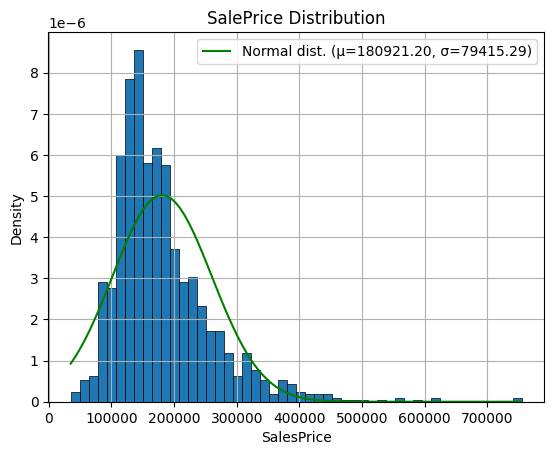

In [14]:
# Normal distribution of data points for the sale price 
mu, sigma = stats.norm.fit(df['SalePrice'])

# Making a histogram of the SalePrice Col
plt.hist(x=df['SalePrice'], bins=50, linewidth=0.5, edgecolor='black', density=True)

# Generate x values
x_norm = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)

# Calculate y values using the normal distribution PDF
y_norm = stats.norm.pdf(x_norm, mu, sigma)

# Plot the normal distribution
plt.plot(x_norm, y_norm, label=f"Normal dist. (μ={mu:.2f}, σ={sigma:.2f})", color="green")
plt.xlabel("SalesPrice")
plt.ylabel("Density")
plt.title("SalePrice Distribution")
plt.grid(True)
plt.legend()
plt.show()




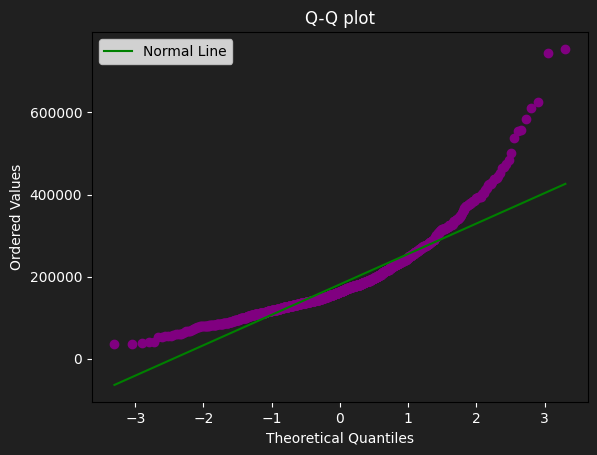

In [15]:
# Generate the Q-Q plot data
qq_data = stats.probplot(df['SalePrice'], dist="norm")

# Create the Q-Q plot
fig, ax = plt.subplots()

# Plot the Q-Q data points
ax.scatter(qq_data[0][0], qq_data[0][1], color='purple')
# This line plots the actual data points for the Q-Q plot, with the theoretical quantiles on the x-axis and the ordered sample values on the y-axis.

# Calculate the line of best fit
slope, intercept, r_value, p_value, std_err = stats.linregress(qq_data[0][0], qq_data[0][1])
# These lines calculate the linear regression (best fit line) for the Q-Q plot data points.
line_x = np.array(qq_data[0][0])
line_y = intercept + slope * line_x
# These lines use the slope and intercept from the linear regression to create the y-values for the best fit line.

# Plot the line of best fit
ax.plot(line_x, line_y, color='green', label='Normal Line')
# This line plots the best fit line on the Q-Q plot.

# Customize the plot
ax.set_title('Q-Q plot', color='white')
ax.set_xlabel('Theoretical Quantiles', color='white')
ax.set_ylabel('Ordered Values', color='white')
ax.legend()
# These lines set the title, x and y axis labels, and add a legend to the plot. All text is colored white.

# Set background colors
fig.patch.set_facecolor((32/255, 32/255, 32/255, 1))
ax.set_facecolor((32/255, 32/255, 32/255, 1))
# These lines set the background color for the entire figure and the axes to match the rgba value provided (dark background).
# The RGBA values are normalized to the range [0, 1].

# Customize the ticks
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
# These lines set the color of the tick labels on both x and y axes to white.

# Show the plot
plt.show()
# This line displays the plot.


What questions do I want to ask the data and how would I investigate it?:

1. Distribution of dwelling types and their relation to sale prices
Question: What is the distribution of dwelling types and how do they relate to sale prices?

Investigation:

Descriptive Statistics: Calculate the mean, median, and standard deviation of sale prices for each dwelling 
type.
Visualization: Use bar plots or box plots to visualize the distribution of sale prices for different dwelling 
types.
2. Types of buildings against sale prices
Question: How do different building types affect sale prices?

Investigation:

Descriptive Statistics: Summarize sale prices for different building types.
Visualization: Create box plots or violin plots to compare sale prices across different building types.
ANOVA Test: Perform an ANOVA test to see if there are statistically significant differences in sale prices among different building types.
3. Does zoning impact sale price?
Question: Does the zoning classification of a property impact its sale price? Will houses cost more in residential, agricultural, or commercial areas?

Investigation:

Descriptive Statistics: Summarize sale prices for different zoning classifications.
Visualization: Create box plots or bar plots to compare sale prices across different zoning categories.
Statistical Testing: Use ANOVA or Kruskal-Wallis test to determine if there are significant differences in sale prices across zoning classifications.
4. Does street and alley access types affect sale price?
Question: How do street and alley access types affect sale prices?

Investigation:

Descriptive Statistics: Calculate average sale prices for properties with different types of street and alley access.
Visualization: Use bar plots or box plots to show the relationship between access types and sale prices.
Regression Analysis: Include street and alley access types as variables in a regression model to assess their impact on sale prices.
5. What is the average sale price by property shape?
Question: What is the average sale price for different property shapes?

Investigation:

Descriptive Statistics: Calculate the average sale price for each property shape category.
Visualization: Use bar plots to display average sale prices for different property shapes.
6. Is there a correlation between property age and sale price?
Question: Is there a correlation between the age of a property and its sale price?

Investigation:

Correlation Analysis: Compute the Pearson or Spearman correlation coefficient between property age and sale price.
Visualization: Create scatter plots to visualize the relationship between property age and sale price.
Regression Analysis: Perform a simple linear regression to model the relationship between property age and sale price.
7. Is there a correlation between living area and sale price?
Question: Is there a correlation between the living area (square footage) of a property and its sale price?

Investigation:

Correlation Analysis: Compute the Pearson or Spearman correlation coefficient between living area and sale price.
Visualization: Create scatter plots to visualize the relationship between living area and sale price.
Regression Analysis: Perform a simple linear regression to model the relationship between living area and sale price.
8. Does price change year to year?
Question: How do sale prices change from year to year?

Investigation:

Time Series Analysis: Summarize sale prices by year to observe trends over time.
Visualization: Use line plots to visualize changes in average sale prices over the years.
Statistical Testing: Perform a trend analysis or time series decomposition to understand patterns and seasonal effects.
Example Code Snippets for o year?

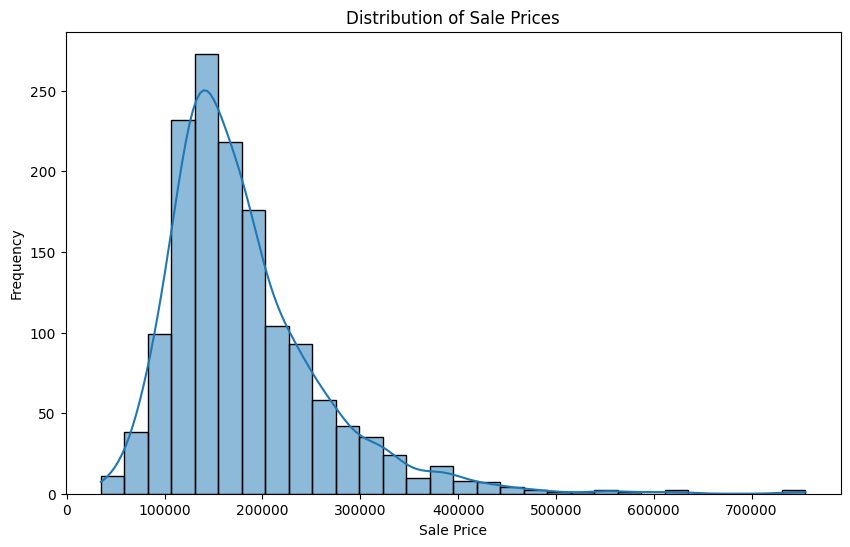

In [16]:
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=FutureWarning, message=".*use_inf_as_na.*")

# Replace infinite values with NaNs
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()







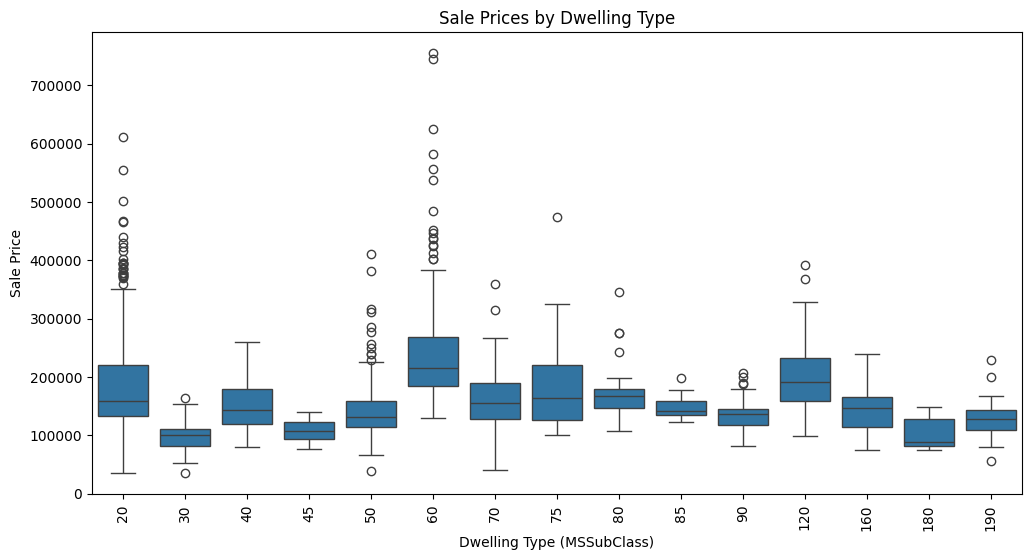

In [17]:
# Distribution of dwelling types and their relation to sale prices
plt.figure(figsize=(12, 6))
sns.boxplot(x='MSSubClass', y='SalePrice', data=df)
plt.title('Sale Prices by Dwelling Type')
plt.xlabel('Dwelling Type (MSSubClass)')
plt.ylabel('Sale Price')
plt.xticks(rotation=90)
plt.show()

20	1-STORY 1946 & NEWER ALL STYLES    
 30	1-STORY 1945 & OLDE    R  40	1-STORY W/FINISHED ATTIC ALL AG    E   45	1-1/2 STORY - UNFINISHED ALL A    G    50	1-1/2 STORY FINISHED ALL     A     60	2-STORY 1946 &     N      70	2-STORY 1945 &            75	2-1/2 STORY A    L        80	SPLIT OR MUL    T
        85	SP    L
        90	DUPLEX - ALL STYLE    SES
       120	1-STORY PUD (Planned Unit Development) - 1    9WER
       150	1-1/2 STORY PU    DAGES
       160	2-STORY PUD -     NEWER
       180	PUD - MULTILEVEL - INCL S    P/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

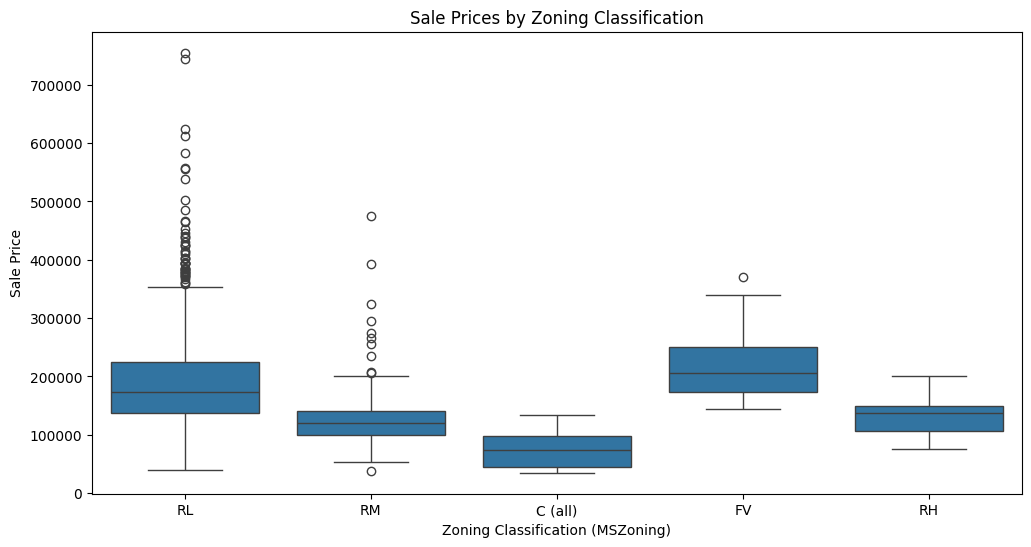

In [18]:
# Zoning impact on sale price
plt.figure(figsize=(12, 6))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('Sale Prices by Zoning Classification')
plt.xlabel('Zoning Classification (MSZoning)')
plt.ylabel('Sale Price')
plt.show()

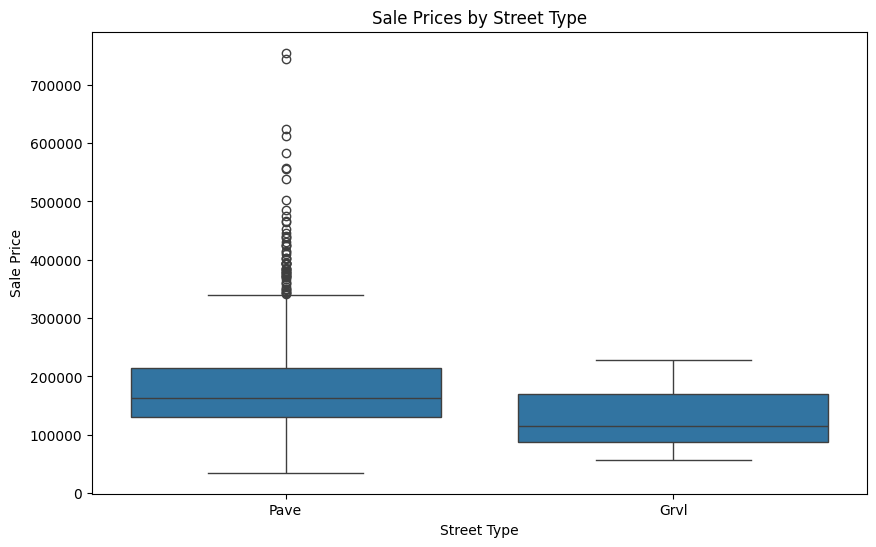

In [19]:
# Street type effect on sale price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Street', y='SalePrice', data=df)
plt.title('Sale Prices by Street Type')
plt.xlabel('Street Type')
plt.ylabel('Sale Price')
plt.show()



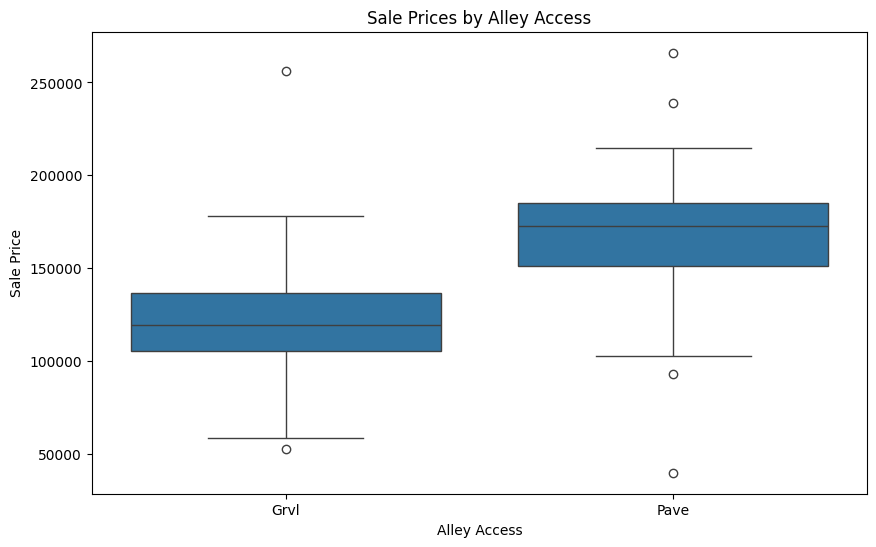

In [20]:
# Alley access effect on sale price
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alley', y='SalePrice', data=df)
plt.title('Sale Prices by Alley Access')
plt.xlabel('Alley Access')
plt.ylabel('Sale Price')
plt.show()

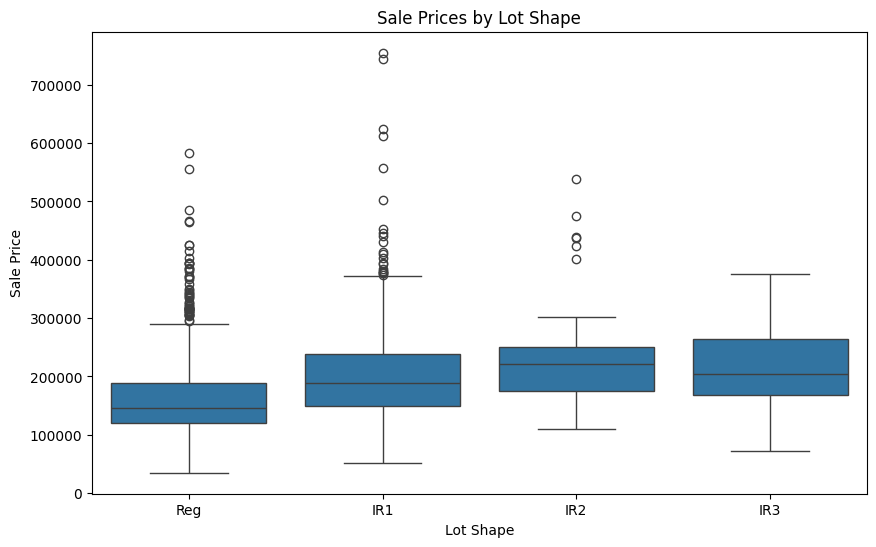

In [21]:
# Average sale price by property shape
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=df)
plt.title('Sale Prices by Lot Shape')
plt.xlabel('Lot Shape')
plt.ylabel('Sale Price')
plt.show()

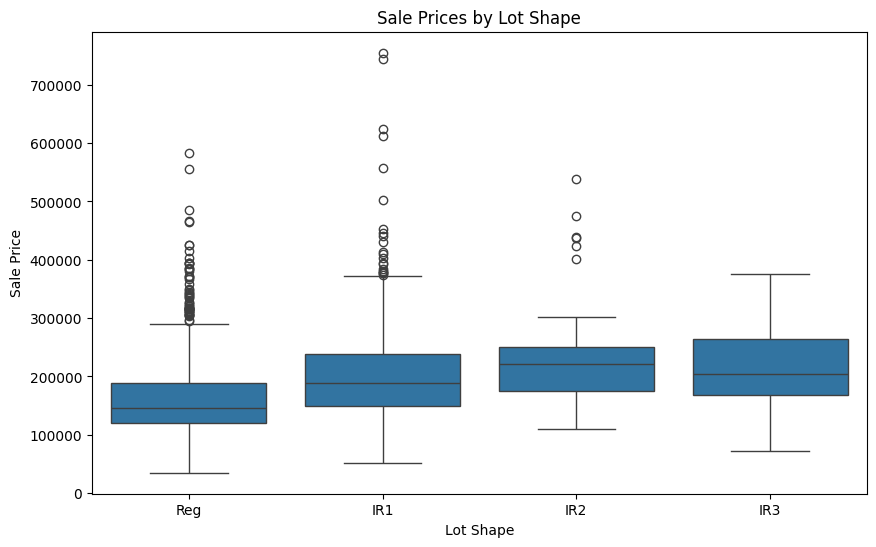

In [22]:
# Average sale price by property shape
plt.figure(figsize=(10, 6))
sns.boxplot(x='LotShape', y='SalePrice', data=df)
plt.title('Sale Prices by Lot Shape')
plt.xlabel('Lot Shape')
plt.ylabel('Sale Price')
plt.show()










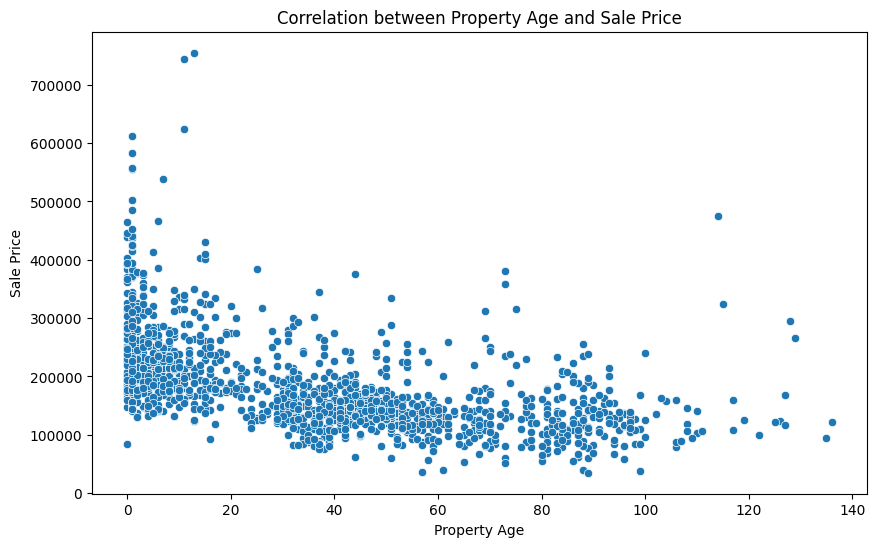

In [23]:
# Correlation between property age and sale price
df['Age'] = df['YrSold'] - df['YearBuilt']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='SalePrice', data=df)
plt.title('Correlation between Property Age and Sale Price')
plt.xlabel('Property Age')
plt.ylabel('Sale Price')
plt.show()


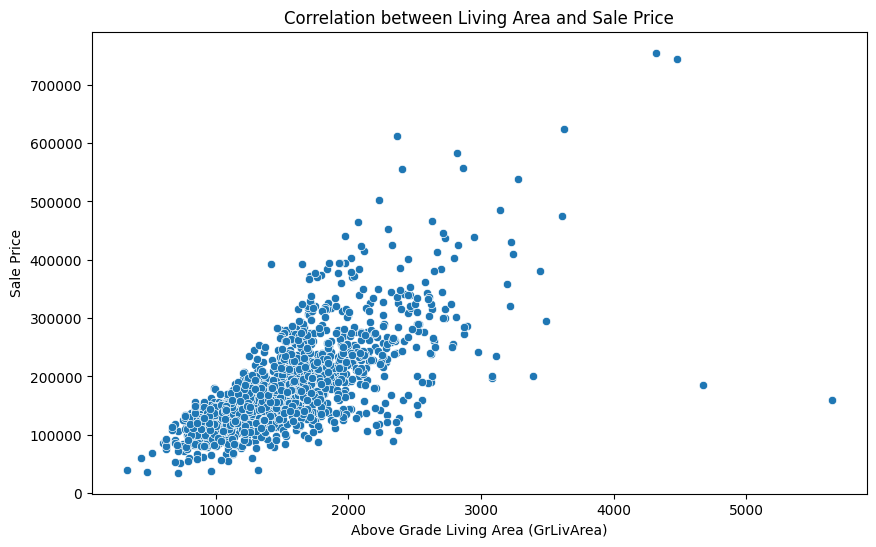

In [24]:
# Correlation between living area and sale price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('Correlation between Living Area and Sale Price')
plt.xlabel('Above Grade Living Area (GrLivArea)')
plt.ylabel('Sale Price')
plt.show()

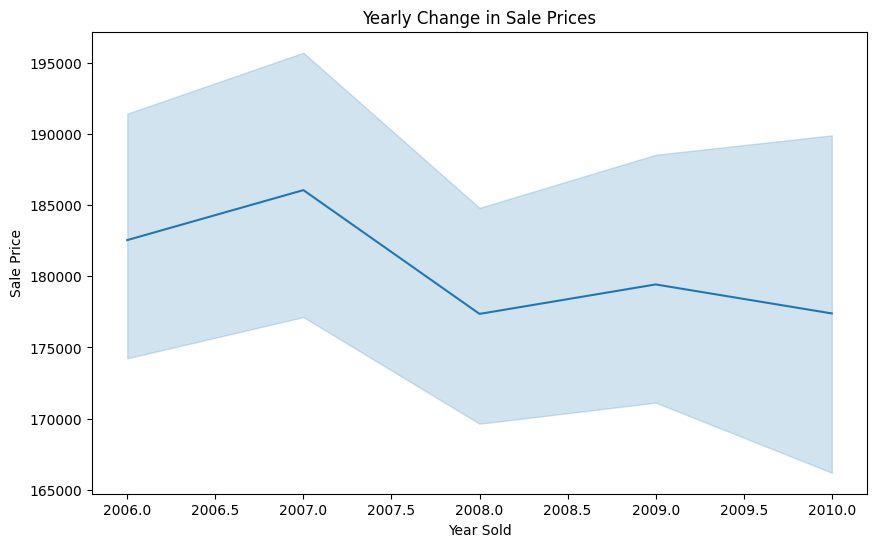

In [25]:
# Yearly change in sale price
plt.figure(figsize=(10, 6))
sns.lineplot(x='YrSold', y='SalePrice', data=df)
plt.title('Yearly Change in Sale Prices')
plt.xlabel('Year Sold')
plt.ylabel('Sale Price')
plt.show()

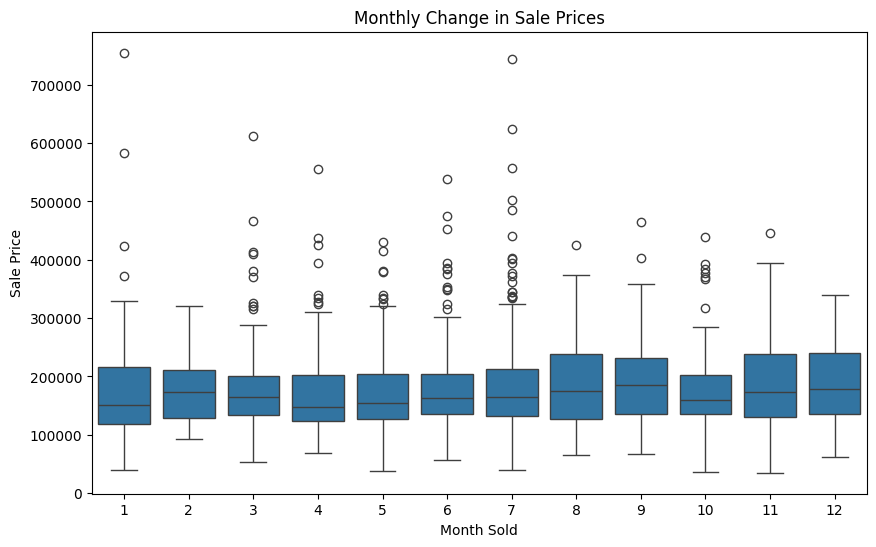

In [26]:
# Monthly change in sale price
plt.figure(figsize=(10, 6))
sns.boxplot(x='MoSold', y='SalePrice', data=df)
plt.title('Monthly Change in Sale Prices')
plt.xlabel('Month Sold')
plt.ylabel('Sale Price')
plt.show()

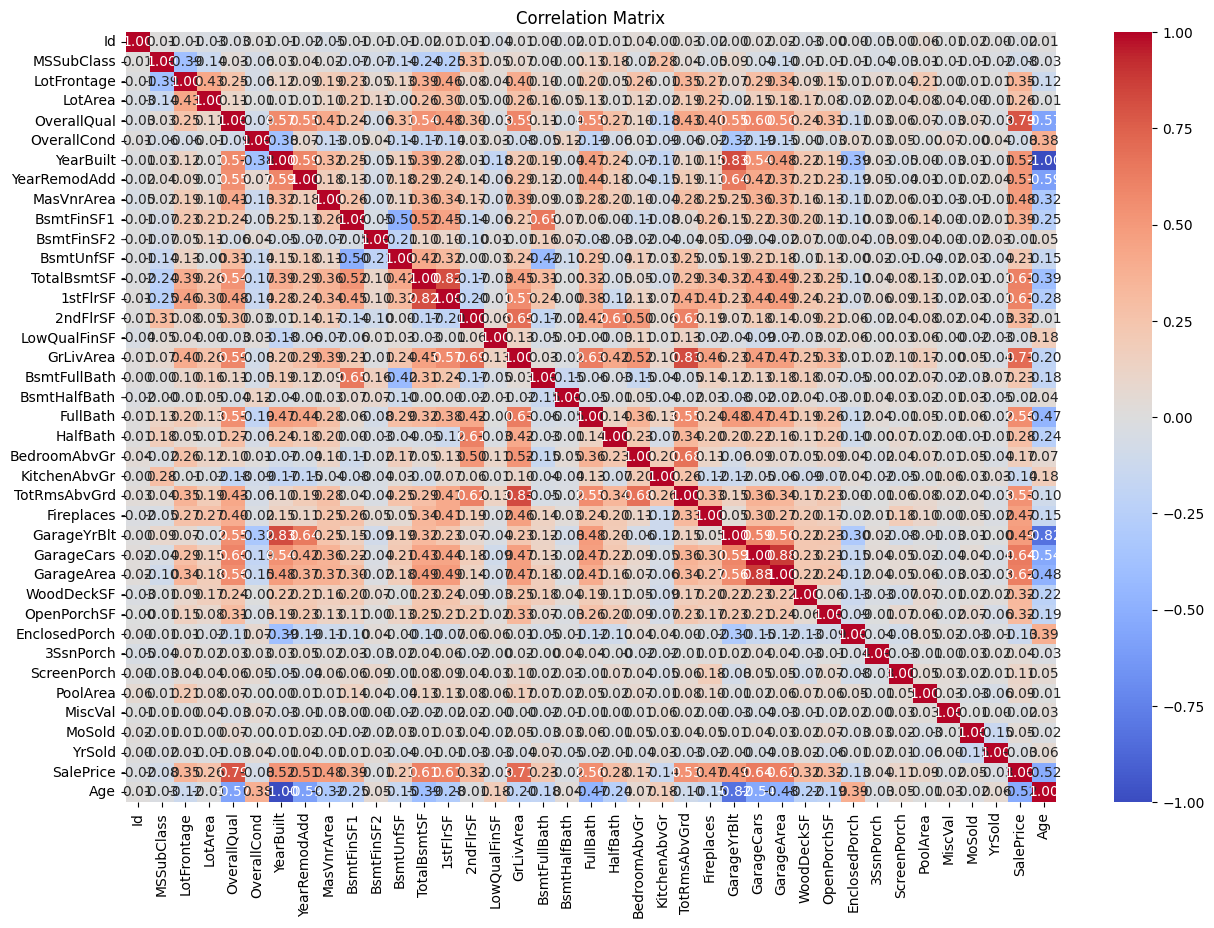

In [27]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Creating a Data Pipeline¶
Why do this? - So we have consistent infrastructure for transforming the test set

Goal - To create infrastructure that lets us make changes without breaking everything

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Define transformers for numerical and categorical columns
# The numerical transformer imputes missing values with the mean and scales the values
# The categorical transformer imputes missing values with a constant value and encodes the values using one-hot encoding
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [32]:
# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns  # Identify categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns  # Identify numerical columns

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')  # Exclude target variable 'SalePrice'

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),  # Apply numerical transformer to numerical columns
        ('cat', categorical_transformer, categorical_columns)  # Apply categorical transformer to categorical columns
    ],
    remainder='passthrough'  # Leave the remaining columns untransformed
)

# Create a pipeline with the preprocessor
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)  # Add preprocessor to the pipeline
])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)  # Separate features from target variable
y = np.log(df['SalePrice'])  # Log-transform the target variable for normalization
X_preprocessed = pipeline.fit_transform(X)  # Fit and transform the features using the pipeline

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
import numpy as np

# Split the data into training and testing sets
# This splits X_preprocessed and y into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define the models to be evaluated
# Models are initialized with their specific parameters
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
# Hyperparameters are defined for tuning the models
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],  # Number of trees in the forest
        'max_depth': [None, 10, 30],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage used to prevent overfitting
        'max_depth': [3, 6, 10],  # Maximum depth of a tree
    }
}

# 3-fold cross-validation
# Cross-validation is used to evaluate the models
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models using GridSearchCV
# GridSearchCV is used to find the best hyperparameters for each model
grids = {}
for model_name, model in models.items():
    print(f'Training and tuning {model_name}...')
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)  # Fit the model to the training data
    
    # Store the best grid search model
    grids[model_name] = grid_search
    
    # Extract best parameters and best score (RMSE)
    best_params = grid_search.best_params_
    best_score = np.sqrt(-1 * grid_search.best_score_)  # RMSE is the square root of the negative mean squared error
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')


Training and tuning LinearRegression...
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 5394655149.9303875

Training and tuning RandomForest...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15332719681534118

Training and tuning XGBoost...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13797005834667236



In [36]:
from sklearn.neural_network import MLPRegressor

# Scale the training and testing sets (copying to maintain the original data)
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Create an MLPRegressor instance
# This initializes the MLPRegressor with specified parameters
mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001)

# Define the parameter grid for tuning
# This grid specifies the hyperparameters to be tuned and their possible values
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 10, 10), (25,)],  # Different configurations of hidden layers
    'activation': ['relu', 'tanh'],  # Activation functions to be tested
    'solver': ['adam'],  # Solver for weight optimization
    'alpha': [0.0001, 0.001, 0.01],  # L2 penalty (regularization term) parameter
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule for weight updates
}

# Create the GridSearchCV object
# GridSearchCV performs exhaustive search over the specified parameter grid
grid_search_mlp = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
# This performs the grid search on the training data to find the best hyperparameters
grid_search_mlp.fit(X_train_scaled, y_train)

# Print the best parameters found during the search
# This outputs the best combination of hyperparameters found
print("Best parameters found: ", grid_search_mlp.best_params_)

# Evaluate the model on the test data
# The best_score_ attribute gives the best score (negative MSE) from the cross-validation
best_score = np.sqrt(-1 * grid_search_mlp.best_score_)  # Convert negative MSE to RMSE
print("Test score: ", best_score)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.2277826778161356


Principal Component Analysis
Basic Feature Engineering

In [38]:
#pca
from sklearn.decomposition import PCA

# Initialize PCA without specifying the number of components
pca = PCA()

# Fit PCA on the preprocessed data and apply the transformation
# This transforms the data into its principal components
X_pca_pre = pca.fit_transform(X_preprocessed)

# Calculate the cumulative explained variance
# This computes the cumulative sum of the explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Choose the number of components based on the explained variance threshold
# This determines the number of principal components that explain at least 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Reinitialize PCA with the optimal number of components
pca = PCA(n_components=n_components)

# Create a pipeline that includes the preprocessing steps and PCA
pipeline_pca = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('pca', pca)  # Apply PCA
])

# Apply the pipeline to the original dataset
# This preprocesses the data and then applies PCA transformation
X_pca = pipeline_pca.fit_transform(X)

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split

# Split the data into training and testing sets
# Here, we split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
# We initialize the models that we want to train and tune
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
# We specify the hyperparameters that we want to tune for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],  # Number of trees in the forest
        'max_depth': [None, 10, 30],      # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],  # Number of boosting rounds
        'learning_rate': [0.01, 0.1, 0.3], # Step size shrinkage
        'max_depth': [3, 6, 10],          # Maximum depth of a tree
    }
}

# 3-fold cross-validation
# Cross-validation is used to evaluate the models
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
# We use GridSearchCV to find the best hyperparameters for each model
grids_pca = {}
for model_name, model in models.items():
    # Create a GridSearchCV object with the specified hyperparameters
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    
    # Fit the GridSearchCV object to the training data
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    
    # Extract the best hyperparameters and score
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)  # Convert negative MSE to RMSE
    
    # Print the best parameters and RMSE for each model
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.1644368953282897

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 500}
Best RMSE for RandomForest: 0.15203045101840346

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.13868348173384015



Running the same models with new data¶


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_pca = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_pca[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_pca[model_name].fit(X_train_pca, y_train_pca)
    best_params = grids_pca[model_name].best_params_
    best_score = np.sqrt(-1 * grids_pca[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for LinearRegression: {}
Best RMSE for LinearRegression: 0.16376488931972885

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for RandomForest: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best RMSE for RandomForest: 0.15202952291393965

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
Best RMSE for XGBoost: 0.1371907076115259



In [ ]:
from sklearn.neural_network import MLPRegressor

X_train_scaled_pca = X_train_pca.copy()
X_test_scaled_pca = X_test_pca.copy()

# Create an MLPRegressor instance
mlp = MLPRegressor(random_state=42,max_iter=10000, n_iter_no_change = 3,learning_rate_init=0.001)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10,10), (10,10,10), (25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01, .1, 1],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}

# Create the GridSearchCV object
grid_search_mlp_pca = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_pca.fit(X_train_scaled_pca, y_train)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_pca.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_pca.best_score_)
print("Test score: ", best_score)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best parameters found:  {'activation': 'tanh', 'alpha': 1, 'hidden_layer_sizes': (10, 10), 'learning_rate': 'constant', 'solver': 'adam'}
Test score:  0.2234130462822934


In [ ]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids[i].predict(X_test), y_test))))

LinearRegression: 791203533.1096208
RandomForest: 0.1468371013683763
XGBoost: 0.13519734581188902


In [ ]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_pca[i].predict(X_test_pca), y_test))))

LinearRegression: 0.14257031594930977
RandomForest: 0.1530222126893243
XGBoost: 0.1439816332632611


In [ ]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp.predict(X_test_scaled),y_test))))

0.16683910272240587


In [ ]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_pca.predict(X_test_scaled_pca),y_test))))


0.16203395693688383


In [40]:
var_explore = df[['Fence','Alley','MiscFeature','PoolQC','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual','MasVnrType','Electrical','MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType','LotFrontage','GarageYrBlt','MasVnrArea','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea','TotalBsmtSF']]

display(HTML(data_window(var_explore, 'var_explore', 'List of Variables to Explore for Feature Engineering')))

,Fence,Alley,MiscFeature,PoolQC,FireplaceQu,GarageCond,GarageQual,GarageFinish,GarageType,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrType,Electrical,MSZoning,Utilities,Exterior1st,Exterior2nd,KitchenQual,Functional,SaleType,LotFrontage,GarageYrBlt,MasVnrArea,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea,TotalBsmtSF
0,NaN,NaN,NaN,NaN,NaN,TA,TA,RFn,Attchd,No,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,65.0,2003.0,196.0,1,0,2,548,856
1,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Gd,Unf,ALQ,TA,Gd,NaN,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD,80.0,1976.0,0.0,0,1,2,460,1262
2,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Mn,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,68.0,2001.0,162.0,1,0,2,608,920
3,NaN,NaN,NaN,NaN,Gd,TA,TA,Unf,Detchd,No,Unf,ALQ,Gd,TA,NaN,SBrkr,RL,AllPub,Wd Sdng,Wd Shng,Gd,Typ,WD,60.0,1998.0,0.0,1,0,3,642,756
4,NaN,NaN,NaN,NaN,TA,TA,TA,RFn,Attchd,Av,Unf,GLQ,TA,Gd,BrkFace,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,84.0,2000.0,350.0,1,0,3,836,1145
5,MnPrv,NaN,Shed,NaN,NaN,TA,TA,Unf,Attchd,No,Unf,GLQ,TA,Gd,NaN,SBrkr,RL,AllPub,VinylSd,VinylSd,TA,Typ,WD,85.0,1993.0,0.0,1,0,2,480,796
6,NaN,NaN,NaN,NaN,Gd,TA,TA,RFn,Attchd,Av,Unf,GLQ,TA,Ex,Stone,SBrkr,RL,AllPub,VinylSd,VinylSd,Gd,Typ,WD,75.0,2004.0,186.0,1,0,2,636,1686
7,NaN,NaN,Shed,NaN,TA,TA,TA,RFn,Attchd,Mn,BLQ,ALQ,TA,Gd,Stone,SBrkr,RL,AllPub,HdBoard,HdBoard,TA,Typ,WD,NaN,1973.0,240.0,1,0,2,484,1107
8,NaN,NaN,NaN,NaN,TA,TA,Fa,Unf,Detchd,No,Unf,Unf,TA,TA,NaN,FuseF,RM,AllPub,BrkFace,Wd Shng,TA,Min1,WD,51.0,1931.0,0.0,0,0,2,468,952
9,NaN,NaN,NaN,NaN,TA,TA,Gd,RFn,Attchd,No,Unf,GLQ,TA,TA,NaN,SBrkr,RL,AllPub,MetalSd,MetalSd,TA,Typ,WD,50.0,1939.0,0.0,1,0,1,205,991


In [ ]:
from sklearn.preprocessing import FunctionTransformer

# feature engineering functions 
def custom_features(df):
    df_out = df.copy()
    df_out['PropertyAge'] = df_out['YrSold'] - df_out['YearBuilt']
    df_out['TotalSF'] = df_out['TotalBsmtSF'] + df_out['1stFlrSF'] + df_out['2ndFlrSF']
    df_out['TotalBath'] = df_out['FullBath'] + 0.5 * df_out['HalfBath'] + df_out['BsmtFullBath'] + 0.5 * df['BsmtHalfBath']
    df_out['HasRemodeled'] = (df_out['YearRemodAdd'] != df_out['YearBuilt']).astype(object)
    df_out['Has2ndFloor'] = (df_out['2ndFlrSF'] > 0).astype(object)
    df_out['HasGarage'] = (df_out['GarageArea'] > 0).astype(object)
    df_out['YrSold_cat'] = df_out['YrSold'].astype(object)
    df_out['MoSold_cat'] = df_out['MoSold'].astype(object)
    df_out['YearBuilt_cat'] = df_out['YearBuilt'].astype(object)
    df_out['MSSubClass_cat'] = df_out['MSSubClass'].astype(object)
    
    return df_out

feature_engineering_transformer = FunctionTransformer(custom_features)


#make this better, one functtion? get new variables in the pipeline?

In [ ]:
# Identify categorical and numerical columns
new_cols_categorical = pd.Index(['HasRemodeled', 'Has2ndFloor', 'HasGarage'])
new_cols_numeric = pd.Index(['PropertyAge', 'TotalSF', 'TotalBath', 'YrSold_cat', 'MoSold_cat', 'YearBuilt_cat', 'MSSubClass_cat'])

# Update categorical and numerical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.append(new_cols_categorical)
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.append(new_cols_numeric)

# Remove target variable from numerical columns
numerical_columns = numerical_columns.drop('SalePrice')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],remainder = 'passthrough')

# Create a pipeline with the preprocessor
pipeline_fe = Pipeline(steps=[
    ('fe', feature_engineering_transformer),
    ('preprocessor', preprocessor),
    ('pca', pca)])

# Apply the pipeline to your dataset
X = df.drop('SalePrice', axis=1)
y = np.log(df['SalePrice'])
X_preprocessed_fe = pipeline_fe.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_preprocessed_fe, y, test_size=0.2, random_state=42)

# Define the models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each model
param_grids = {
    'LinearRegression': {},
    'RandomForest': {
        'n_estimators': [100, 200, 500],
        'max_depth': [None, 10, 30],
        'min_samples_split': [2, 5, 10],
    },
    'XGBoost': {
        'n_estimators': [100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.3],
        'max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the models
grids_fe = {}
for model_name, model in models.items():
    #print(f'Training and tuning {model_name}...')
    grids_fe[model_name] = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grids_fe[model_name].fit(X_train_fe, y_train_fe)
    best_params = grids_fe[model_name].best_params_
    best_score = np.sqrt(-1 * grids_fe[model_name].best_score_)
    
    print(f'Best parameters for {model_name}: {best_params}')
    print(f'Best RMSE for {model_name}: {best_score}\n')

In [ ]:
X_train_scaled_fe = X_train_fe.copy()
X_test_scaled_fe = X_test_fe.copy()

# Create an MLPRegressor instance
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3)

# Define the parameter grid for tuning
param_grid = {
    'hidden_layer_sizes': [(10,), (10, 10), (10, 25)],
    'activation': ['relu', 'tanh', 'sigmoid'],
    'solver': ['adam', 'sgd'],
    'alpha': [.1, .5, 1, 10, 100],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'learning_rate_init' : [0.1]
}

# Create the GridSearchCV object
from sklearn.model_selection import GridSearchCV
grid_search_mlp_fe = GridSearchCV(mlp, param_grid, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# Fit the model on the training data
grid_search_mlp_fe.fit(X_train_scaled_fe, y_train_fe)

# Print the best parameters found during the search
print("Best parameters found: ", grid_search_mlp_fe.best_params_)

# Evaluate the model on the test data
best_score = np.sqrt(-1 * grid_search_mlp_fe.best_score_)
print("Test score: ", best_score)

In [ ]:
from sklearn.metrics import mean_squared_error
for i in grids.keys():
    print (i + ': ' + str(np.sqrt(mean_squared_error(grids_fe[i].predict(X_test_fe), y_test))))

In [ ]:
print( str(np.sqrt(mean_squared_error(grid_search_mlp_fe.predict(X_test_scaled_fe),y_test))))

In [ ]:
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [ ]:
df_test_preprocessed = pipeline_fe.transform(df_test)

In [ ]:
#xgboost submission
y_xgboost = np.exp(grids_fe['XGBoost'].predict(df_test_preprocessed))

df_xgboost_out = df_test[['Id']].copy()
df_xgboost_out['SalePrice'] = y_xgboost

#
df_xgboost_out.to_csv('submission_xgboost_new_features_normalized.csv', index=False)

In [ ]:
#rf submission
y_rf = np.exp(grids_fe['RandomForest'].predict(df_test_preprocessed))

df_rf_out = df_test[['Id']].copy()
df_rf_out['SalePrice'] = y_rf

#
df_rf_out.to_csv('submission_rf_normalized.csv', index=False)

In [ ]:
#mlp submission
y_mlp = np.exp(grid_search_mlp_fe.predict(df_test_preprocessed))

df_mlp_out = df_test[['Id']].copy()
df_mlp_out['SalePrice'] = y_mlp

df_mlp_out.to_csv('submission_mlp_normalized.csv', index=False)

In [ ]:
y_avg_ens = (y_rf + y_xgboost + y_mlp)/3

#xgboost submission
df_avg_ens_out = df_test[['Id']].copy()
df_avg_ens_out['SalePrice'] = y_avg_ens

#
df_avg_ens_out.to_csv('submission_avg_ens_new_features_normalized.csv', index=False)

In [ ]:
rom sklearn.ensemble import StackingRegressor

grids_fe['MLP'] =   grid_search_mlp_fe

best_estimators = [(model_name, grid.best_estimator_) for model_name, grid in grids_fe.items()]

# Define the candidate meta-models
meta_models = {
    'MLP': MLPRegressor(random_state=42, max_iter=10000, n_iter_no_change=3, learning_rate_init=0.001),
    'LinearRegression': LinearRegression(),
    'XGBoost': XGBRegressor(random_state=42)
}

# Define the hyperparameter grids for each meta-model
meta_param_grids = {
    'MLP': {
        'final_estimator__hidden_layer_sizes': [(10,), (10, 10)],
        'final_estimator__activation': ['relu', 'tanh'],
        'final_estimator__solver': ['adam', 'sgd'],
        'final_estimator__alpha': [ 0.001, 0.01, .1, .5],
        'final_estimator__learning_rate': ['constant', 'invscaling', 'adaptive'],
    },
    'LinearRegression': {},
    'XGBoost': {
        'final_estimator__n_estimators': [100, 200, 500],
        'final_estimator__learning_rate': [0.01, 0.1, 0.3],
        'final_estimator__max_depth': [3, 6, 10],
    }
}

# 3-fold cross-validation
cv = KFold(n_splits=3, shuffle=True, random_state=42)

# Train and tune the stacking ensemble
best_score = float('inf')
best_model = None

for meta_name, meta_model in meta_models.items():
    print(f'Training and tuning {meta_name} as the meta-model...')
    stacking_regressor = StackingRegressor(estimators=best_estimators, final_estimator=meta_model, cv=cv)
    grid_search = GridSearchCV(estimator=stacking_regressor, param_grid=meta_param_grids[meta_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_fe, y_train_fe)
    best_params = grid_search.best_params_
    best_rmse = np.sqrt(-1 * grid_search.best_score_)
    
    print(f'Best parameters for {meta_name}: {best_params}')
    print(f'Best RMSE for {meta_name}: {best_rmse}\n')
    
    if best_rmse < best_score:
        best_score = best_rmse
        best_model = grid_search

# Evaluate the best stacking ensemble on the test data
y_pred = best_model.predict(X_test_fe)
rmse = np.sqrt(mean_squared_error(y_test_fe, y_pred))
print(f"Best stacking ensemble's RMSE on test data: {rmse}")